In [1]:
#Disable warns in worst way :( 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import pandas as pd
import random

In [3]:
from explainerdashboard.datasets import titanic_survive, titanic_names

In [4]:
from explainerdashboard.datasets import titanic_survive, titanic_names

In [5]:
X_train, y_train, X_test, y_test = titanic_survive()
train_names, test_names = titanic_names()

In [6]:
X_train.head()

,Fare,Age,PassengerClass,No_of_siblings_plus_spouses_on_board,No_of_parents_plus_children_on_board,Sex_female,Sex_male,Sex_nan,Deck_A,Deck_B,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unkown,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Embarked_Unknown
Passenger,,,,,,,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",7.2500,22.0,3,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
"Heikkinen, Miss. Laina",7.9250,26.0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
"Allen, Mr. William Henry",8.0500,35.0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
"Moran, Mr. James",8.4583,-999.0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
"McCarthy, Mr. Timothy J",51.8625,54.0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [7]:


small_list = [i for i in range(0,20)]
big_list = [i for i in range(80,100)]
big_small_list = small_list + big_list
medium_list = [i for i in range(30,70)] 

def assign_nonlinear(dfy,iloc, sample_positivie, sample_negative):
    if dfy.iloc[iloc] == 1:
        return random.choice(sample_positivie) / 50
    else:
        return random.choice(sample_negative) / 50
        


In [8]:
#NONLINEAR
#TO make it nonlinear either select small values or big values
nonlinear_vals_train = [ assign_nonlinear( y_train,i,big_small_list,medium_list ) for i in range(len(y_train)) ]
nonlinear_vals_test = [ assign_nonlinear( y_test,i ,big_small_list,medium_list) for i in range(len(y_test)) ]

#LINEAR
#TO make it linear select big value
linear_vals_train = [ assign_nonlinear( y_train,i,big_list, small_list) for i in range(len(y_train)) ]
linear_vals_test = [ assign_nonlinear( y_test,i ,big_list, small_list) for i in range(len(y_test)) ]

#NORELATION
#TO make it not related select always medium values
norelation_vals_train = [ assign_nonlinear( y_train,i,medium_list, medium_list) for i in range(len(y_train)) ]
norelation_vals_test = [ assign_nonlinear( y_test,i ,medium_list, medium_list) for i in range(len(y_test)) ]




In [9]:
#Comment here if if u want to see the standard sample without added variables.

import pandas as pd
#X_train = pd.DataFrame()
#X_test = pd.DataFrame()

In [10]:
X_train["nonlinear_vals_train"] = nonlinear_vals_train
X_train["linear_vals_train"] = linear_vals_train
X_train["norelation_vals_train"] = norelation_vals_train
X_train["y_temp"] = y_train.values

X_test["nonlinear_vals_test"] = nonlinear_vals_test
X_test["linear_vals_test"] = linear_vals_test
X_test["norelation_vals_test"] = norelation_vals_test

In [11]:
X_train.head(5)

,Fare,Age,PassengerClass,No_of_siblings_plus_spouses_on_board,No_of_parents_plus_children_on_board,Sex_female,Sex_male,Sex_nan,Deck_A,Deck_B,...,Deck_T,Deck_Unkown,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Embarked_Unknown,nonlinear_vals_train,linear_vals_train,norelation_vals_train,y_temp
Passenger,,,,,,,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",7.2500,22.0,3,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0.96,0.30,0.96,0
"Heikkinen, Miss. Laina",7.9250,26.0,3,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1.72,1.78,1.10,1
"Allen, Mr. William Henry",8.0500,35.0,3,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1.38,0.00,0.86,0
"Moran, Mr. James",8.4583,-999.0,3,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1.16,0.32,1.04,0
"McCarthy, Mr. Timothy J",51.8625,54.0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1.24,0.30,0.90,0


In [12]:
X_test.head(5)

,Fare,Age,PassengerClass,No_of_siblings_plus_spouses_on_board,No_of_parents_plus_children_on_board,Sex_female,Sex_male,Sex_nan,Deck_A,Deck_B,...,Deck_G,Deck_T,Deck_Unkown,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Embarked_Unknown,nonlinear_vals_test,linear_vals_test,norelation_vals_test
Passenger,,,,,,,,,,,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",71.2833,38.0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1.86,1.74,0.98
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,35.0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1.74,1.84,1.30
"Palsson, Master. Gosta Leonard",21.0750,2.0,3,3,1,0,1,0,0,0,...,0,0,1,0,0,1,0,1.06,0.08,0.80
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",11.1333,27.0,3,0,2,1,0,0,0,0,...,0,0,1,0,0,1,0,1.62,1.88,1.22
"Nasser, Mrs. Nicholas (Adele Achem)",30.0708,14.0,2,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0.00,1.78,1.28


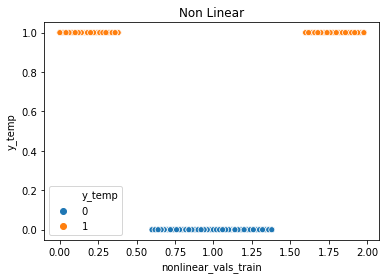

In [13]:
_ = sns.scatterplot(x="nonlinear_vals_train", y="y_temp", data=X_train, hue="y_temp").set(title='Non Linear')

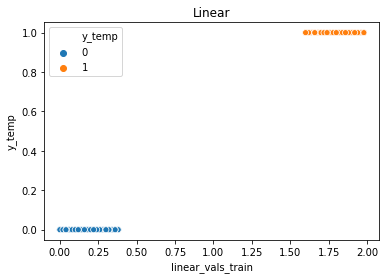

In [14]:
_ = sns.scatterplot(x="linear_vals_train", y="y_temp", data=X_train, hue="y_temp").set(title='Linear')

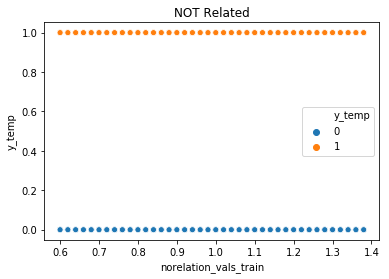

In [15]:
_ = sns.scatterplot(x="norelation_vals_train", y="y_temp", data=X_train, hue="y_temp").set(title='NOT Related')

In [16]:
X_train.drop('y_temp', axis=1, inplace=True)

In [17]:
train_names[:5]

['Braund, Mr. Owen Harris',
 'Heikkinen, Miss. Laina',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [ ]:
model = RandomForestClassifier(n_estimators=50, max_depth=5)
model.fit(X_train, y_train)

explainer = ClassifierExplainer(model, X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
db = ExplainerDashboard(explainer, simple=True)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Calculating shap values...
Generating layout...
Calculating confusion matrices...
Calculating prediction probabilities...
Calculating roc auc curves...
Calculating dependencies...
Calculating pred_percentiles...
Calculating metrics...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [ ]:
db.run(port=9000)

Starting ExplainerDashboard on http://172.29.7.129:9000
Dash is running on http://0.0.0.0:9000/

 * Serving Flask app 'explainerdashboard.dashboards' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://172.29.7.129:9000/ (Press CTRL+C to quit)
